In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats

In [2]:
taxi = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

In [3]:
taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
taxi.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [6]:
taxi.shape

(22699, 18)

In [7]:
taxi.size

408582

In [8]:
taxi.sort_values('trip_distance', ascending= False, axis=0)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.00,1,N,162,264,2,5.50,0.5,0.5,0.00,0.00,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.00,1,N,79,148,3,8.50,1.0,0.5,0.00,0.00,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.00,1,N,193,193,1,2.50,0.0,0.5,0.66,0.00,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.00,1,N,145,145,2,2.50,0.5,0.5,0.00,0.00,0.3,3.80


In [9]:
taxi.sort_values(by='total_amount', ascending=False)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.50,0.0,-0.5,0.00,0.00,-0.3,-5.30
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.00,-0.5,-0.5,0.00,0.00,-0.3,-5.30
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.00,-1.0,-0.5,0.00,0.00,-0.3,-5.80
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.50,-0.5,-0.5,0.00,0.00,-0.3,-5.80


upon the first glance of the Dataset some observations are: 
- there 22699 rows of data with 18 data fields. 
- 2 columns which are suppose to be of datatime type are actually objects. 
- trip_distance(expressing the distance travelling in that trip) has 33.96 has maximum distance travelled. 
- total_amount(potentially a dependent value) has few values which are significantly higher than the other data points. 
- the most expensive ride is not longest ride. 

In [10]:
taxi['payment_type'].value_counts()

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

there are 4 payment types.(from pace document):
- 1- Credit card
- 2- Cash
- 3- No Charge
- 4- Dispute

In [11]:
taxi.groupby(by='VendorID')['VendorID'].agg('count')

VendorID
1    10073
2    12626
Name: VendorID, dtype: int64

there are only 2 vendors

In [12]:
taxi.groupby(by='payment_type')['tip_amount'].mean()

payment_type
1    2.7298
2    0.0000
3    0.0000
4    0.0000
Name: tip_amount, dtype: float64

only if the trip's payment is through credit card there is an average tip of 2.7298 otherwise no tip.

In [13]:
taxi.groupby(by='VendorID')['total_amount'].mean().reset_index().rename(columns={'total_amount': 'mean_total_amount'})

,VendorID,mean_total_amount
0,1,16.298119
1,2,16.320382


In [14]:
taxi['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    22600
Y       99
Name: count, dtype: int64

In [15]:
taxi['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

- there are only 7 passenger counts, with maximum passenger count of 6.
- most of the passenger travel individually

In [16]:
taxi_cc_tip = taxi[taxi['payment_type'] == 1]
taxi_cc_tip.groupby(by=['passenger_count'])[['tip_amount']].mean()

,tip_amount
passenger_count,
0,2.610370
1,2.714681
2,2.829949
3,2.726800
4,2.607753
5,2.762645
6,2.643326


In [17]:
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])

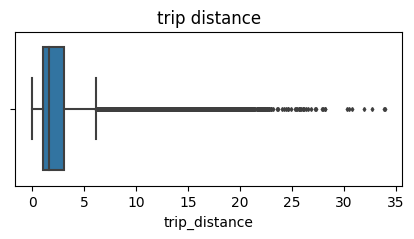

In [18]:
plt.figure(figsize=(5,2))
plt.title('trip distance')
sns.boxplot(x=taxi['trip_distance'], fliersize=2)
plt.show()

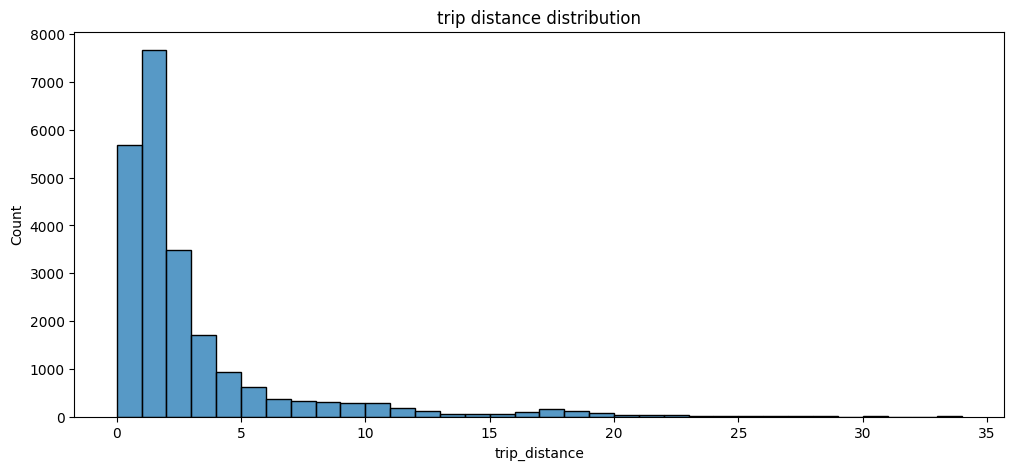

In [19]:
plt.figure(figsize=(12,5))
plt.title('trip distance distribution')
sns.histplot(x=taxi['trip_distance'], bins=range(0, 35, 1))
plt.show()

most of the datapoint in trip distance are within 6 
most of the rides are within 2 miles, after 2 miles there is a significant drop in the numbers

<Axes: title={'center': 'total amount'}, xlabel='total_amount'>

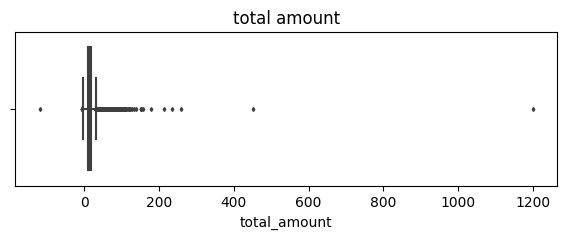

In [20]:
plt.figure(figsize=(7, 2))
plt.title('total amount')
sns.boxplot(x=taxi['total_amount'], fliersize=2)

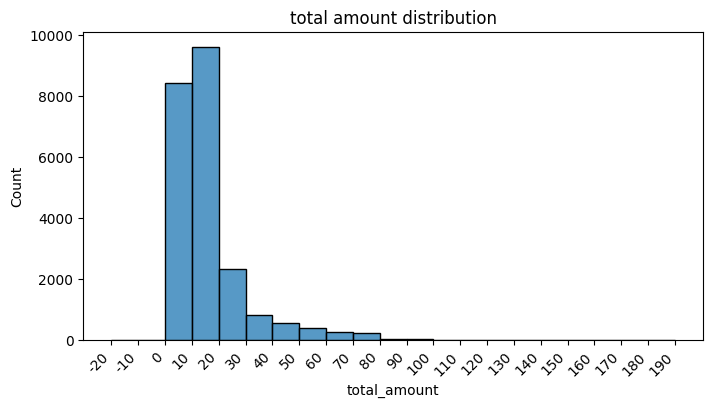

In [21]:
plt.figure(figsize=(8,4))
plt.title('total amount distribution')
ax = sns.histplot(x=taxi['total_amount'], bins=range(-20, 200, 10))
ax.set_xticks(range(-20, 200, 10))
ax.set_xticklabels(range(-20, 200, 10))
plt.xticks(rotation=45, horizontalalignment='right', size=10)
plt.show()

the distribution is the skewwed towards the right with less data points after 80, and most of the datapoints falling within 0 and 20. 

<Axes: title={'center': 'tip amount'}, xlabel='tip_amount'>

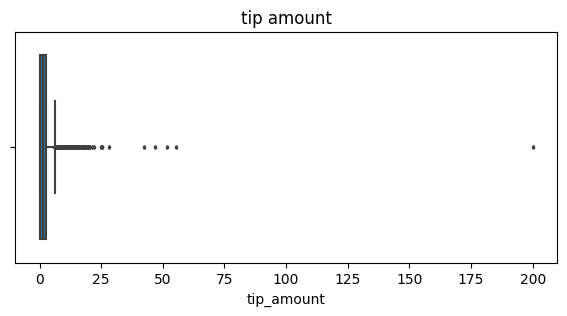

In [22]:
plt.figure(figsize=(7, 3))
plt.title('tip amount')
sns.boxplot(x=taxi['tip_amount'], fliersize=2)

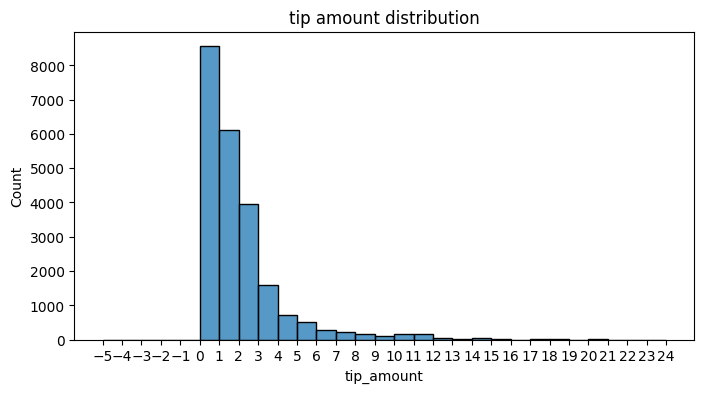

In [23]:
plt.figure(figsize=(8,4))
plt.title('tip amount distribution')
ax=sns.histplot(x=taxi['tip_amount'], bins=range(-5, 25, 1))
ax.set_xticks(range(-5, 25, 1))
plt.show()

the most tipped amount is in between 0 and 4. very less tip datapoints fpond exceeding 6. 

<Axes: title={'center': 'tip amount distribution based on vendor id'}, xlabel='tip_amount', ylabel='Count'>

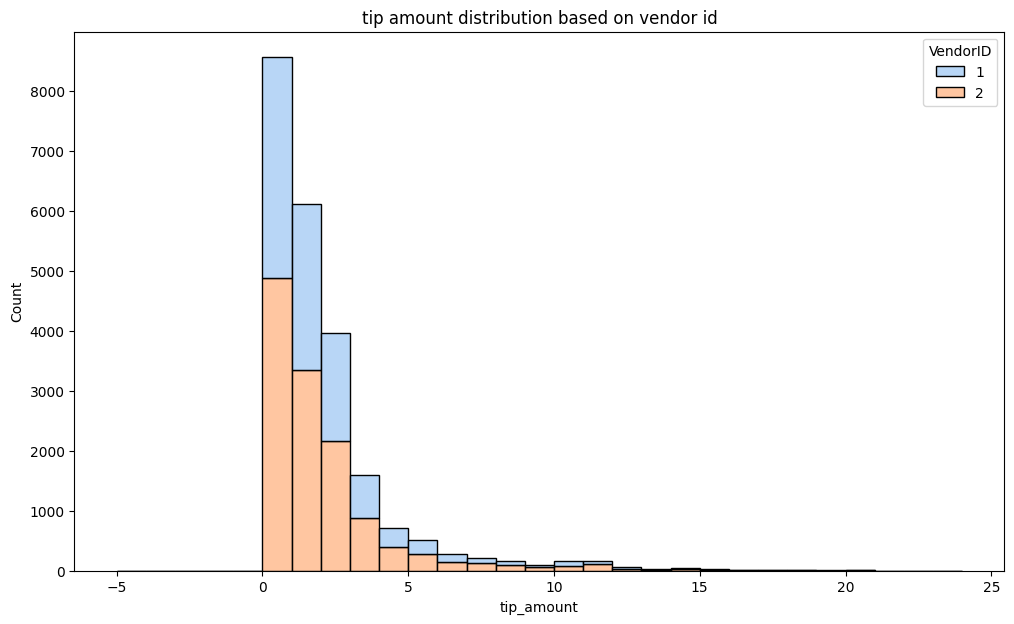

In [24]:
plt.figure(figsize=(12,7))
plt.title('tip amount distribution based on vendor id')
sns.histplot(x=taxi['tip_amount'],
             hue=taxi['VendorID'],
             bins=range(-5, 25, 1),
             color='blue',
             palette='pastel',
             multiple='stack')

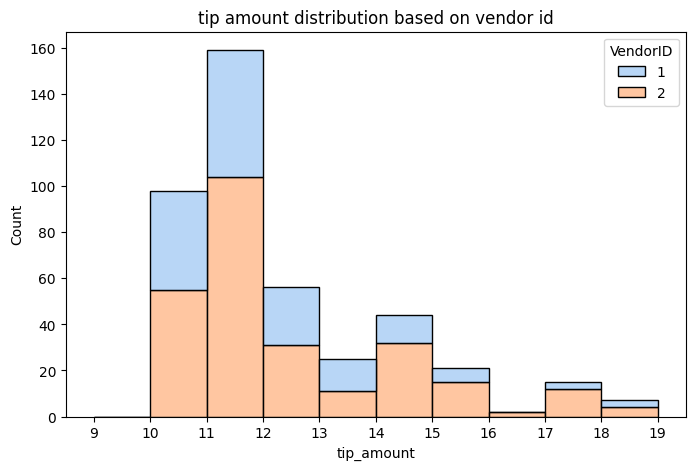

In [25]:
#entries with tip amoune > 10
taxi_tip = taxi[taxi['tip_amount']>10]

plt.figure(figsize=(8,5))
plt.title('tip amount distribution based on vendor id')
ax = sns.histplot(x=taxi_tip['tip_amount'],
             bins=range(9,20,1), 
             hue=taxi_tip['VendorID'],
             color='blue',
             palette='pastel',
             multiple='stack')
ax.set_xticks(range(9, 20, 1))
plt.show()

In [26]:
mean_tip_by_passenger_count = taxi.groupby(by=['passenger_count'])[['tip_amount']].mean().rename(
    columns={'tip_amount' : 'mean_tip_amount'})

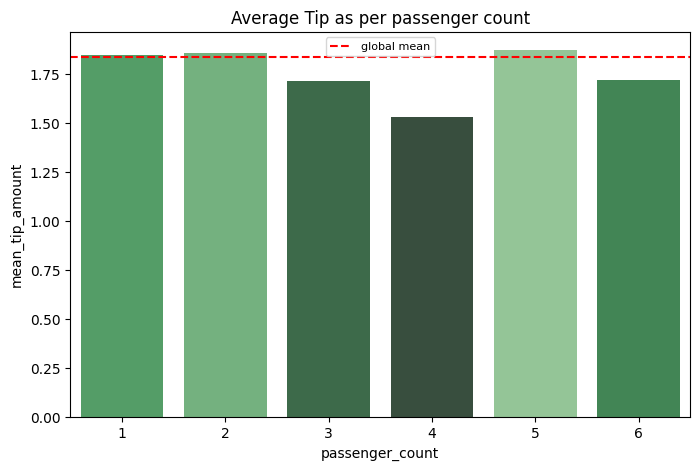

In [27]:
data = mean_tip_by_passenger_count.tail(-1)
pal = sns.color_palette('Greens_d', len(data))
rank = data['mean_tip_amount'].argsort().argsort()
plt.figure(figsize=(8, 5))
plt.title('Average Tip as per passenger count', fontsize=12)
ax = sns.barplot(x=data.index, y=data['mean_tip_amount'], palette=np.array(pal[::-1])[rank])
ax.axhline(taxi['tip_amount'].mean(), ls = '--', label='global mean', color = 'red')
plt.legend(fontsize=8)
plt.show()

In [28]:
taxi['pickup_month'] = taxi['tpep_pickup_datetime'].dt.month_name()
taxi['pickup_day'] = taxi['tpep_pickup_datetime'].dt.day_name()

In [29]:
taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,pickup_day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday


In [30]:
monthly_rides = taxi['pickup_month'].value_counts()
monthly_rides.sort_values()

pickup_month
July         1697
August       1724
September    1734
February     1769
November     1843
December     1863
June         1964
January      1997
May          2013
April        2019
October      2027
March        2049
Name: count, dtype: int64

In [31]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

In [32]:
monthly_rides.reindex(index=month_order)

pickup_month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

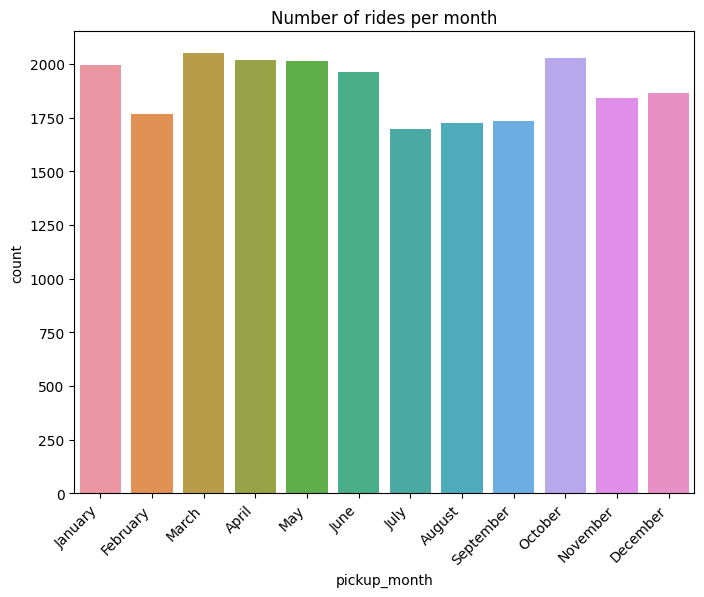

In [33]:
plt.figure(figsize=(8,6))
plt.title('Number of rides per month')
sns.barplot(x=monthly_rides.index, y=monthly_rides, order=month_order)
plt.xticks(rotation = 45, horizontalalignment='right')
plt.show()

In [34]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = taxi['pickup_day'].value_counts()
daily_rides.reindex(index = days_order)

pickup_day
Monday       2931
Tuesday      3198
Wednesday    3390
Thursday     3402
Friday       3413
Saturday     3367
Sunday       2998
Name: count, dtype: int64

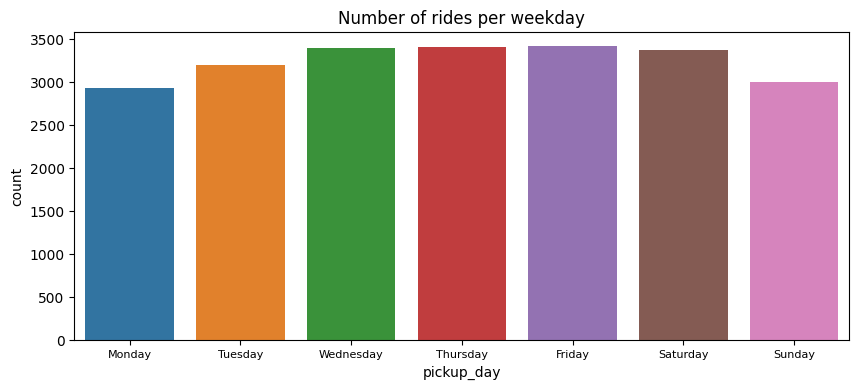

In [35]:
plt.figure(figsize=(10, 4))
plt.title('Number of rides per weekday')
sns.barplot(x=daily_rides.index, y=daily_rides, order = days_order)
plt.xticks(fontsize=8)
plt.show()

In [36]:
#total amount on that week day
amount_per_day = taxi.groupby(by=['pickup_day'])[['total_amount']].sum()
amount_per_day = amount_per_day.reindex(index = days_order)

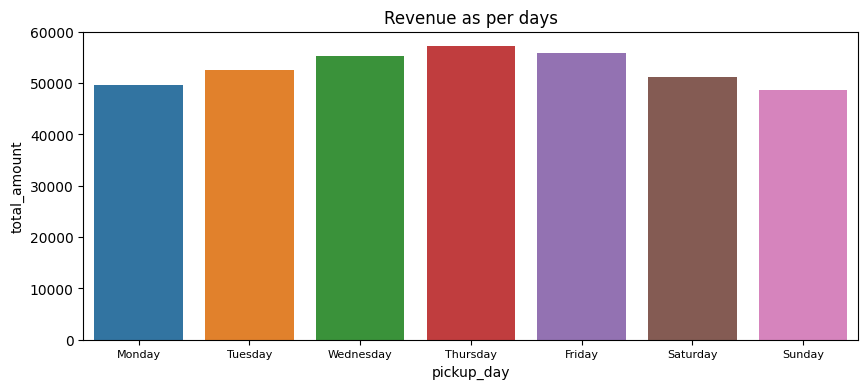

In [37]:
plt.figure(figsize=(10, 4))
plt.title('Revenue as per days')
ax = sns.barplot(x=amount_per_day.index, y=amount_per_day['total_amount'], order = days_order)
plt.xticks(fontsize=8)
plt.show()

In [38]:
#total amount as per month
amount_per_month = taxi.groupby(by=['pickup_month'])[['total_amount']].sum()
amount_per_month = amount_per_month.reindex(index = month_order)
amount_per_month

,total_amount
pickup_month,
January,31735.25
February,28937.89
March,33085.89
April,32012.54
May,33828.58
June,32920.52
July,26617.64
August,27759.56
September,28206.38


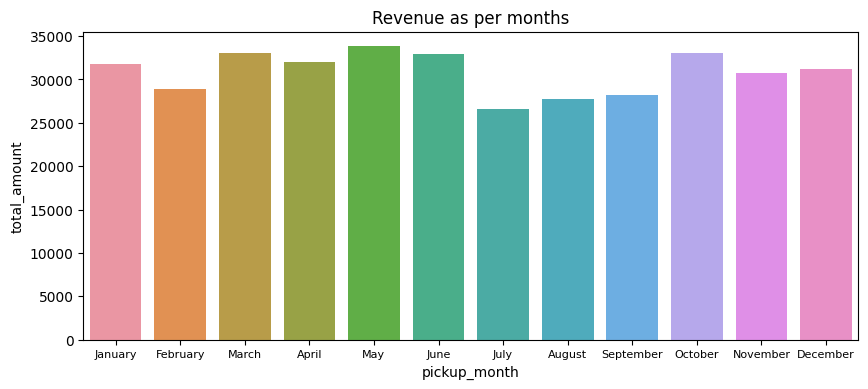

In [39]:
plt.figure(figsize=(10, 4))
plt.title('Revenue as per months')
sns.barplot(x=amount_per_month.index, y=amount_per_month['total_amount'], order = month_order)
plt.xticks(fontsize=8)
plt.show()

In [40]:
taxi['DOLocationID'].nunique()

216

In [41]:
mean_distance = taxi.groupby(by = 'DOLocationID')[['trip_distance']].mean()
mean_distance = mean_distance.sort_values(by='trip_distance')

In [42]:
mean_distance

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


Text(0.5, 0, 'DOlocationID')

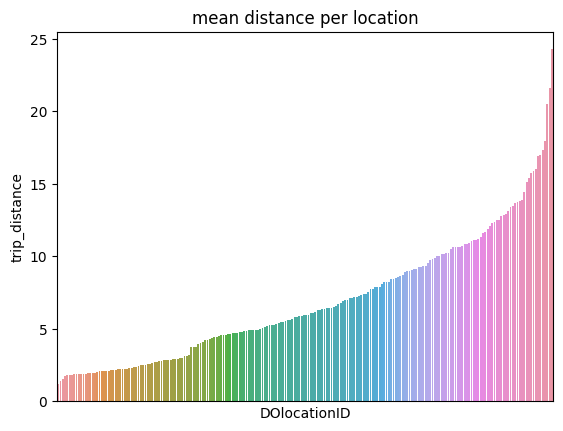

In [43]:
plt.title('mean distance per location')
sns.barplot(x=mean_distance.index, y=mean_distance['trip_distance'], order = mean_distance.index)
plt.xticks([])
plt.xlabel('DOlocationID')

In [44]:
taxi['ride_duration'] = taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']

In [45]:
taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,pickup_day,ride_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,March,Saturday,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,April,Tuesday,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,December,Friday,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,May,Sunday,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,April,Saturday,0 days 00:16:43


In [46]:
taxi.groupby(by='payment_type')[['fare_amount']].mean()

,fare_amount
payment_type,
1,13.429748
2,12.213546
3,12.186116
4,9.913043


we can see that the payment through credit cards are sligtly higher than cash payments. This can be either by chance or even statistically significant to confirm this we run a hypthesis test. 

Hypothesis testing
- Stating the null hypothesis and alternative hypothesis
- null hypothesis H(o) - there is no difference in fare amounts between credit card payments and cash payments
- alternate hypothesis H(A)- there is diffference in fare amounts for payment made through credit cards and cash payments.

In [47]:
#statistical significance
statistical_significance = 0.05

In [48]:
#calculation of pvalue
credit_taxi = taxi[taxi['payment_type'] == 1]
cash_taxi = taxi[taxi['payment_type'] == 2]

tscore, pvalue = stats.ttest_ind(credit_taxi['fare_amount'], cash_taxi['fare_amount'], equal_var=False)

In [49]:
#reject or fail to reject the null hypothesis
if pvalue < statistical_significance : 
    print('reject the null hypothesis')
else:
    print('fail to rejec the null hypothesis')

reject the null hypothesis


As the pvalue is less than the significance level we can conclude that the higher payments by credit cards are statistically significant. for example: the credit cards users may get rewards or incentives for using there credit cards for some threshold amount from credit card agency. 

In [50]:
sample_taxi = taxi.sample(n=100, replace=True, random_state=13245)

calculating the confidence interval - manually

In [51]:
#sample mean and sample standard deviation
sample_mean = sample_taxi['tip_amount'].mean()
sample_std = sample_taxi['tip_amount'].std()

In [52]:
#select the confidence level
confidence_level = 0.95

In [53]:
#calculate the margin of error
#for confidence level of 95% the zscore is 1.96
standard_error = sample_std / np.sqrt(sample_taxi.shape[0])
zscore = 1.96
margin_of_error = zscore * standard_error

In [54]:
#calculate the confidence interval
lower_limit = sample_mean - margin_of_error
upper_limit = sample_mean + margin_of_error
[lower_limit, upper_limit]

[1.8094794197444704, 3.42932058025553]

In [55]:
#calculating the confidence interval - scipy
stats.norm.interval(alpha = confidence_level, loc = sample_mean, scale = standard_error)

C:\Users\punith kumar\AppData\Local\Temp\ipykernel_21708\407768713.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  stats.norm.interval(alpha = confidence_level, loc = sample_mean, scale = standard_error)


(1.8094943022251937, 3.4293056977748066)

In [56]:
taxi['tip_amount'].mean()

1.8357813119520685

- we can see that the manually calculated confidence interval and intervals from scipy are the same. 
- To conclude we can say that there is the 95% chance that the mean tip amount of the population falls between 2.5384094302225195 and 2.700390569777481. the population mean is 1.836 which is within the confidence interval.
- This way a point estimate of datafields of the population which are very huge and calculations on the whole population is time consuming and costlier. 

In [57]:
#importing new libraries
from datetime import datetime
from datetime import date
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [58]:
print(taxi.drop_duplicates().shape)
print(taxi.shape)

(22699, 21)
(22699, 21)


In [59]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

In [60]:
taxi.ride_duration.head()

0   0 days 00:14:04
1   0 days 00:26:30
2   0 days 00:07:12
3   0 days 00:30:15
4   0 days 00:16:43
Name: ride_duration, dtype: timedelta64[ns]

In [61]:
taxi0 = taxi.copy()

In [62]:
taxi0['duration'] = (taxi0['tpep_dropoff_datetime'] - taxi0['tpep_pickup_datetime']) / np.timedelta64(1, 'm')

outlier checking

In [63]:
taxi0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Unnamed: 0             22699 non-null  int64          
 1   VendorID               22699 non-null  int64          
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns] 
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns] 
 4   passenger_count        22699 non-null  int64          
 5   trip_distance          22699 non-null  float64        
 6   RatecodeID             22699 non-null  int64          
 7   store_and_fwd_flag     22699 non-null  object         
 8   PULocationID           22699 non-null  int64          
 9   DOLocationID           22699 non-null  int64          
 10  payment_type           22699 non-null  int64          
 11  fare_amount            22699 non-null  float64        
 12  extra                  22699 non-null  float64

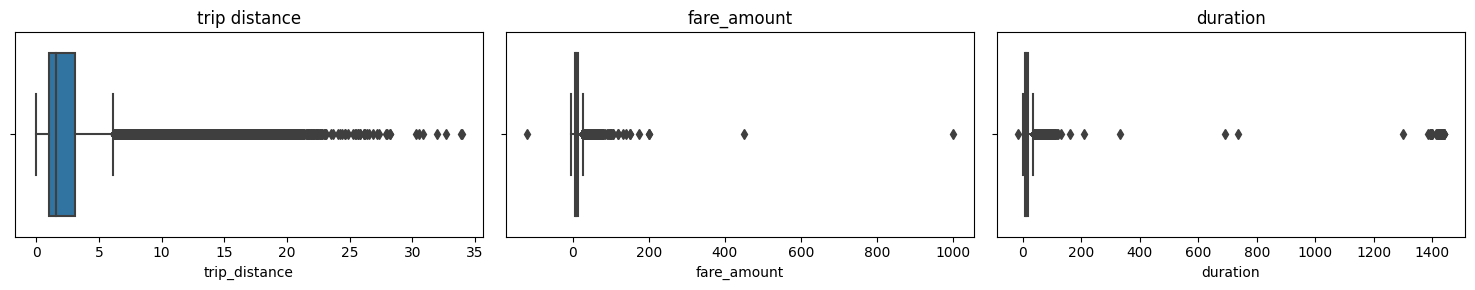

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15,3))
sns.boxplot(x = taxi0['trip_distance'], ax = axes[0])
axes[0].set_title('trip distance')
sns.boxplot(x = taxi0['fare_amount'], ax = axes[1])
axes[1].set_title('fare_amount')
sns.boxplot(x = taxi0['duration'], ax = axes[2])
axes[2].set_title('duration')
plt.tight_layout()
plt.show()

In [65]:
print(sorted(set(taxi0['trip_distance']))[:10])

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]


In [66]:
sum(taxi0['trip_distance']==0)

148

there are only 148 values which are zeros, comparing to the size of the dataset of 23000, 148 values with zero is less significant. Although we can replace with any statistical value. But for now we continue without handling those values as it is less significant. 

In [67]:
taxi0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [68]:
print(taxi0['fare_amount'].min())
taxi0.loc[taxi0['fare_amount']<0, 'fare_amount'] = 0
print(taxi0['fare_amount'].min())

-120.0
0.0


money for any cancelled ride could me zero, bt negative values in fare amount is not meaningful therefore, we change the negative values to zero

as per requirement the outliers in the right extreme of fare amount is required to be change into Q3 + (6 * IQR) if it exceeds the same. 

In [69]:
#method to impute maximum threshold to fareamount
def outlier_removal(columns, iqr_factor):
    for col in columns:
        taxi0.loc[taxi0[col]<0, col] = 0
        
        q1 = taxi0[col].quantile(0.25)
        q3 = taxi0[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + (iqr_factor * iqr)
        taxi0.loc[taxi0[col]>upper_limit, col] = upper_limit
        
        print(taxi0[col].describe())


count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64


<Axes: xlabel='fare_amount'>

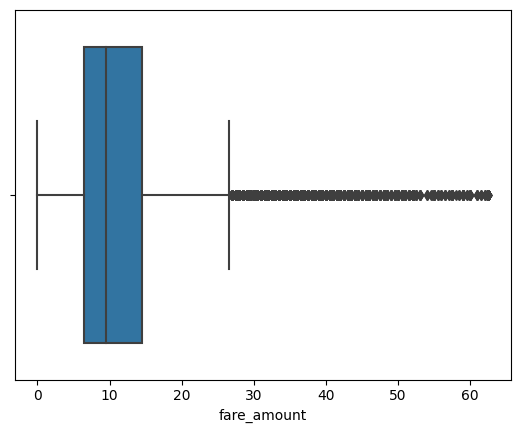

In [70]:
outlier_removal(['fare_amount'], 6)
sns.boxplot(x = taxi0['fare_amount'])

In [71]:
taxi0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64


<Axes: xlabel='duration'>

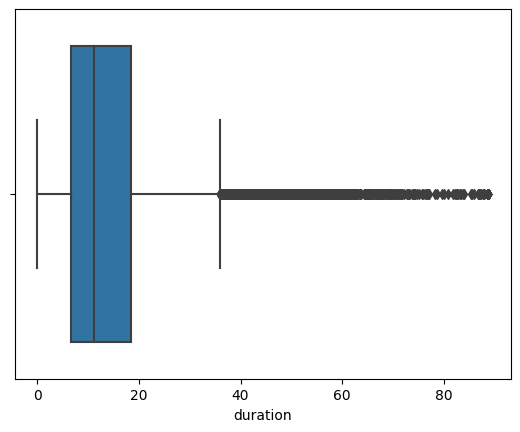

In [72]:
#calling outlier_removal method to remove outliers for duration. to removal negative values and the positive outliers
outlier_removal(['duration'], 6)
sns.boxplot(x=taxi0['duration'])

In [73]:
taxi0['pickup_dropoff'] = taxi0['PULocationID'].astype(str) + ' ' + taxi0['DOLocationID'].astype(str)

In [74]:
mean_distance_group = taxi0.groupby(by = ['pickup_dropoff'])[['trip_distance']].mean()

In [75]:
mean_distance_dict = mean_distance_group.to_dict()

In [76]:
mean_distance_dict = mean_distance_dict['trip_distance']

In [77]:
taxi0['mean_distance'] = taxi0['pickup_dropoff'].map(mean_distance_dict)

In [78]:
mean_distance_group = taxi0.groupby(by = ['pickup_dropoff'])[['duration']].mean()
mean_distance_dict = mean_distance_group.to_dict()
mean_distance_dict = mean_distance_dict['duration']
taxi0['mean_duration'] = taxi0['pickup_dropoff'].map(mean_distance_dict)
taxi0.head(1)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,pickup_month,pickup_day,ride_duration,duration,pickup_dropoff,mean_distance,mean_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,March,Saturday,0 days 00:14:04,14.066667,100 231,3.521667,22.847222


In [79]:
taxi0['rush_hour'] = taxi0['tpep_pickup_datetime'].dt.hour

In [80]:
taxi0.loc[taxi0['pickup_day'].isin(['Saturday', 'Sunday']), 'rush_hour'] = 0 

In [81]:
def rush_hourizer(hour):
    if (6 <= hour['rush_hour'] < 10) or (16 <= hour['rush_hour'] < 20):
        return 1
    return 0

In [82]:
taxi0.loc[(taxi0.pickup_day != 'Saturday') & (taxi0.pickup_day != 'Sunday'), 'rush_hour'] = taxi0.apply(rush_hourizer, axis=1)

Visualizations (Scatter plots):

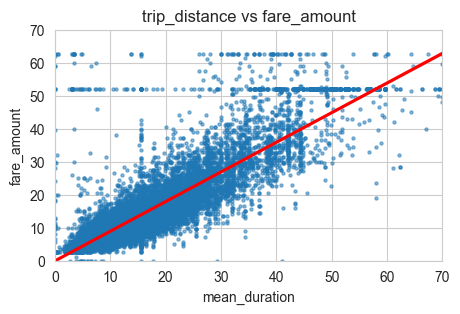

In [83]:
sns.set_style(style= 'whitegrid')
f = plt.figure(figsize=[5,3])
sns.regplot(x='mean_duration', y = 'fare_amount', data = taxi0, scatter_kws = {'alpha':0.5, 's':5}, line_kws ={'color':'red'})
plt.xlim(0,70)
plt.ylim(0,70)
plt.title('trip_distance vs fare_amount')
plt.show()

In [84]:
# setting pandas to display all the columns
pd.set_option('display.max_columns', None)
taxi0[taxi0['fare_amount']==52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_month,pickup_day,ride_duration,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,March,Sunday,0 days 00:36:48,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,June,Saturday,0 days 01:06:51,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,November,Saturday,0 days 00:00:58,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,December,Wednesday,0 days 00:29:11,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,September,Sunday,0 days 00:29:29,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,February,Tuesday,0 days 00:39:50,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,June,Monday,0 days 00:15:37,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,August,Thursday,0 days 00:45:27,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,September,Tuesday,0 days 00:42:51,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,April,Sunday,0 days 01:11:35,71.583333,132 148,17.994286,46.340476,0


In [85]:
taxi_df = taxi0.copy()

taxi_df = taxi_df.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'pickup_day', 'pickup_month', 'ride_duration'
               ], axis=1)

taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [86]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


C:\Users\punith kumar\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


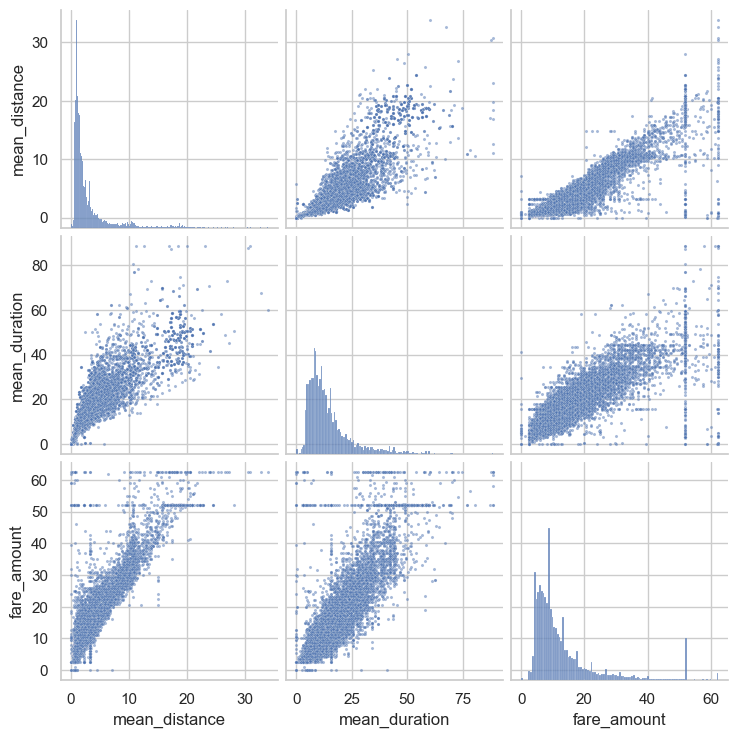

In [87]:
sns.set(style = 'whitegrid')
sns.pairplot(taxi_df[['mean_distance', 'mean_duration', 'fare_amount']], plot_kws={'alpha' : 0.5, 's':5})

In [88]:
taxi_df.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


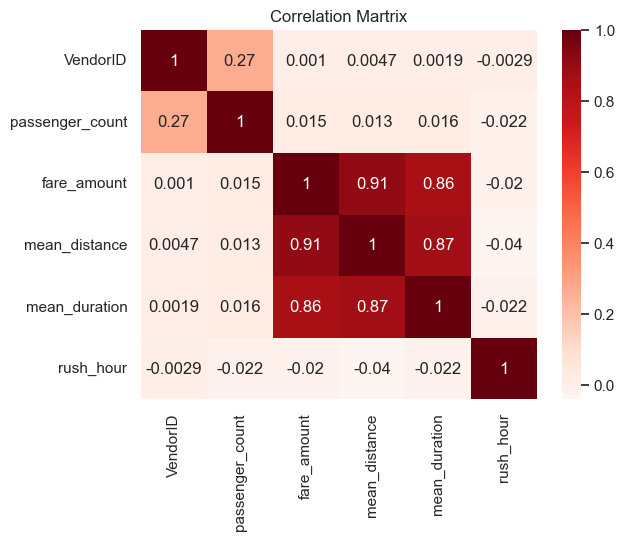

In [89]:
sns.heatmap(taxi_df.corr(method='pearson'), annot=True, cmap='Reds')
plt.title('Correlation Martrix')
plt.show()

In [90]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


In [91]:
X = taxi_df.drop(columns = ['fare_amount'])
y = taxi_df['fare_amount']

In [92]:
X['VendorID'] = X['VendorID'].astype(str)

X = pd.get_dummies(X, drop_first=True, dtype=int)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [94]:
scaler = StandardScaler().fit(X_train)
X_train_scaler = scaler.transform(X_train)
print('X_train_scaler', X_train_scaler)

X_train_scaler [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


In [95]:
lr = LinearRegression()
lr.fit(X_train_scaler, y_train)

LinearRegression()

In [96]:
r_score = lr.score(X_train_scaler, y_train)
print('coefficient for calculation', r_score)
y_pred_train = lr.predict(X_train_scaler)
print('Mean Squared Error', mean_squared_error(y_train, y_pred_train))
print('Mean Absolute Error', mean_absolute_error(y_train, y_pred_train))
print('r2_score', r2_score(y_train, y_pred_train))
print('RSME', np.sqrt(mean_squared_error(y_train, y_pred_train)))

coefficient for calculation 0.8398434585044773
Mean Squared Error 17.88973296349268
Mean Absolute Error 2.1866664167754144
r2_score 0.8398434585044773
RSME 4.229625629236313


In [97]:
scaler = StandardScaler().fit(X_test)
X_test_scaler = scaler.transform(X_test)

In [98]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaler, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaler)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8686398614725134
R^2: 0.8686398614725134
MAE: 2.108030005028722
MSE: 14.284967625845088
RMSE: 3.7795459549852133
